**Import all the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [5]:
data = pd.read_csv('covid.csv')
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index
0,IND,India,1/16/2021,181,15144,803090,191181,15.144,803.090,191.181,68.98
1,IND,India,1/17/2021,145,13788,779377,33120,13.788,779.377,33.120,68.98
2,IND,India,1/18/2021,137,10050,548168,229748,10.050,548.168,229.748,68.98
3,IND,India,1/19/2021,162,13816,709791,220786,13.816,709.791,220.786,68.98
4,IND,India,1/20/2021,151,15244,764120,131649,15.244,764.120,131.649,68.98


Check for the number of unique countries in our dataset

In [7]:
data['location'].unique()

array(['India', 'Israel', 'Japan'], dtype=object)

Since we cannot forecast the data for all the countries at the same time. So, lets do it for India

In [9]:
country = "India"
data = data[data['location']==country]

In [11]:
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date', ascending = True, inplace = True)
data['date'].min(),data['date'].max()

(Timestamp('2021-01-16 00:00:00'), Timestamp('2021-07-05 00:00:00'))

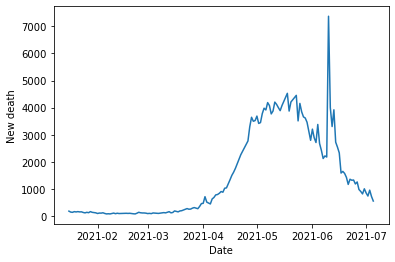

In [13]:
plt.xlabel('Date')
plt.ylabel('New death')
plt.plot(data['date'], data['new_deaths'])

**Using Rolling mean average to forecast the data**

Rolling mean means taking avearage of last i days.

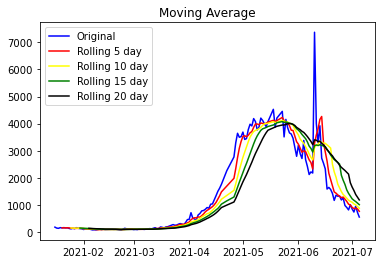

In [14]:
rolling_mean5 = data['new_deaths'].rolling(window = 5).mean()
rolling_mean10 = data['new_deaths'].rolling(window = 10).mean()
rolling_mean15 = data['new_deaths'].rolling(window = 15).mean()
rolling_mean20 = data['new_deaths'].rolling(window = 20).mean()
plt.plot(data['date'], data['new_deaths'], color = 'blue', label = 'Original')
plt.plot(data['date'], rolling_mean5, color = 'red', label = 'Rolling 5 day')
plt.plot(data['date'], rolling_mean10, color = 'yellow', label = 'Rolling 10 day')
plt.plot(data['date'], rolling_mean15, color = 'green', label = 'Rolling 15 day')
plt.plot(data['date'], rolling_mean20, color = 'black', label = 'Rolling 20 day')
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.show()

Rolling5 day i.e red is more close to blue while when we increase the rolling window then it deviates from blue to large extent

In [15]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
0,IND,India,2021-01-16,181,15144,803090,191181,15.144,803.090,191.181,68.98,NaN,NaN,NaN,NaN
1,IND,India,2021-01-17,145,13788,779377,33120,13.788,779.377,33.120,68.98,NaN,NaN,NaN,NaN
2,IND,India,2021-01-18,137,10050,548168,229748,10.050,548.168,229.748,68.98,NaN,NaN,NaN,NaN
3,IND,India,2021-01-19,162,13816,709791,220786,13.816,709.791,220.786,68.98,NaN,NaN,NaN,NaN
4,IND,India,2021-01-20,151,15244,764120,131649,15.244,764.120,131.649,68.98,155.2,NaN,NaN,NaN


In [19]:
data.dropna(inplace=True)
data.head(5)

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
19,IND,India,2021-02-04,120,12408,742841,509893,12.408,742.841,509.893,61.57,109.8,123.6,130.266667,136.50
20,IND,India,2021-02-05,95,11713,715776,457404,11.713,715.776,457.404,61.57,105.2,119.4,125.733333,132.20
21,IND,India,2021-02-06,78,12059,740794,358473,12.059,740.794,358.473,61.57,102.0,114.9,120.800000,128.85
22,IND,India,2021-02-07,84,11831,695789,37040,11.831,695.789,37.040,61.57,96.8,107.0,116.066667,126.20
23,IND,India,2021-02-08,78,9110,532236,446646,9.110,532.236,446.646,61.57,91.0,101.1,112.533333,122.00


Hw do we come up with rolling 5 10 15. How do we know which number is good to start with?

So, correlation data wrt to lag tells us that lag above dotted line are significant. i.e. shorter times are good lags 

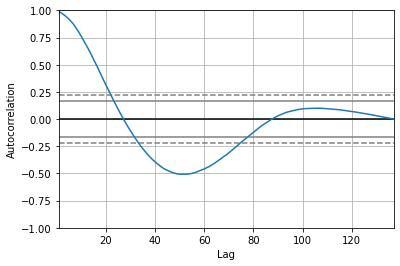

In [20]:
autocorrelation_plot(data['new_cases'])
plt.show()


/home/meta-sapien/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


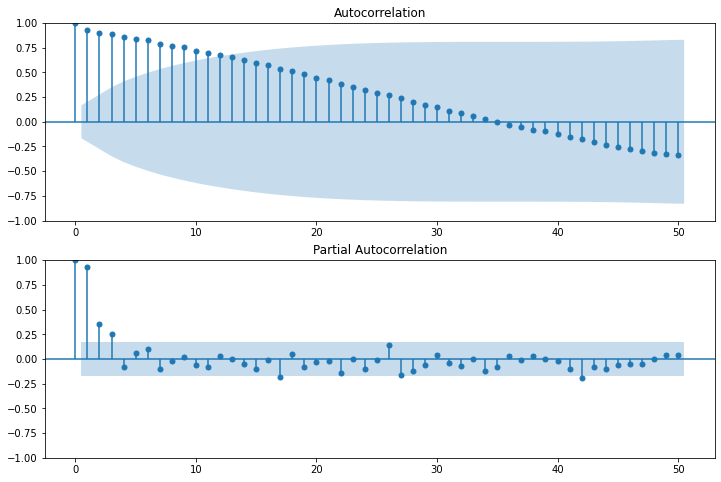

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['new_deaths'].dropna(),lags=50, ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['new_deaths'].dropna(),lags= 50, ax = ax2)
    

less than 5 day lag are good 

In [29]:
#1,1,0 ARIMA Models

model = sm.tsa.arima.ARIMA(data.new_deaths, order = (1,1,0))
model_fit = model.fit()
print(model_fit.summary())

/home/meta-sapien/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/meta-sapien/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/meta-sapien/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             new_deaths   No. Observations:                  137
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1051.418
Date:                Fri, 30 Sep 2022   AIC                           2106.835
Time:                        12:14:58   BIC                           2112.661
Sample:                             0   HQIC                          2109.203
                                - 137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3609      0.030    -12.046      0.000      -0.420      -0.302
sigma2      3.058e+05   6921.383     44.183      0.000    2.92e+05    3.19e+05
Ljung-Box (L1) (Q):                   1.14   Jarque-

In [30]:
#5,1,0 ARIMA Models

model = sm.tsa.arima.ARIMA(data.new_deaths, order = (5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             new_deaths   No. Observations:                  137
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1046.078
Date:                Fri, 30 Sep 2022   AIC                           2104.157
Time:                        12:21:06   BIC                           2121.633
Sample:                             0   HQIC                          2111.259
                                - 137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4359      0.046     -9.484      0.000      -0.526      -0.346
ar.L2         -0.2243      0.059     -3.826      0.000      -0.339      -0.109
ar.L3          0.0131      0.100      0.130      0.8

/home/meta-sapien/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/meta-sapien/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/meta-sapien/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


we can see that lag 1 and 2 are significant while the others are not significant

Test MAE: 130.958


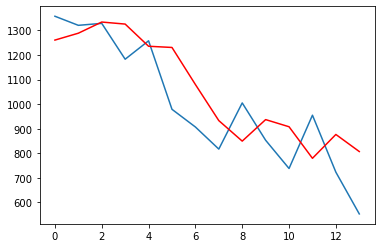

In [36]:
X = data['new_deaths'].values
size = int(len(X)*0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
prediction = list()

#Walk forward validation:
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order = (1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[t]
    history.append(obs)
    # print predicted = %f, expected = %f % (yhat, obs)
    
# evaluate the forecast

mae = mean_absolute_error(test, prediction)
print('Test MAE: %.3f' %mae)
# Plot the forecast against actual outcomes

plt.plot(test)
plt.plot(prediction, color='red')
plt.show()

Mean absolute error is 130.958: Miscomputing on an average

In [37]:
mae5day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_20day'])

In [38]:
print(f'Mean absolute average error from 5 day moving average prediction: {mae5day}')
print(f'Mean absolute average error from 10 day moving average prediction: {mae10day}')
print(f'Mean absolute average error from 15 day moving average prediction: {mae15day}')
print(f'Mean absolute average error from 20 day moving average prediction: {mae20day}')

Mean absolute average error from 5 day moving average prediction: 110.38571428571426
Mean absolute average error from 10 day moving average prediction: 297.4928571428572
Mean absolute average error from 15 day moving average prediction: 670.4666666666666
Mean absolute average error from 20 day moving average prediction: 991.2785714285712
